## Spambase assignment 

In [11]:
#Import Python Libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import nltk 
from nltk.corpus import stopwords
import string


## Question 1.Import the spam dataset and print the first six rows

In [12]:
data = pd.read_csv("C:/Python/assignment/spam_dataset.csv")

data.head(6)



,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### Question 2. Read through the documentation of the original dataset here: http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names The dependent variable is "spam" where one indicates that an email is spam and zero otherwise. Which three variables in the dataset do you think will be important predictors in a model of spam? Why? 

Answer - word_freq_remove:, word_freq_your:, word_freq_000: -  This are the variables with the highest value of correlation to spam which is the target variable.


In [13]:
final_data = data[['word_freq_remove:', 'word_freq_your:', 'word_freq_000:','spam']]

In [14]:
#update data to set up for train test split
X = final_data.loc[:, final_data.columns != 'spam']
y = final_data['spam']

In [63]:
data.corr().head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
word_freq_make:,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address:,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all:,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d:,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our:,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over:,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604


## Question 3. Visualize the univariate distribution of each of the variables in the previous question. 



C:\Users\jvicm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_freq_remove:', ylabel='Density'>

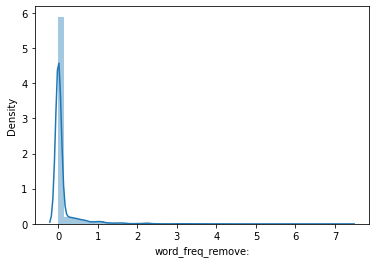

In [16]:
sns.distplot(data['word_freq_remove:'],kde=True)

C:\Users\jvicm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_freq_your:', ylabel='Density'>

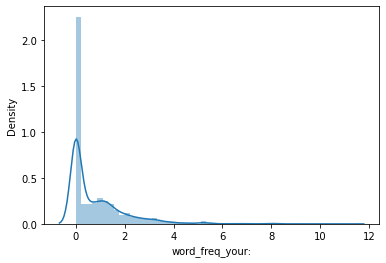

In [17]:
sns.distplot(data['word_freq_your:'],kde=True)

C:\Users\jvicm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_freq_000:', ylabel='Density'>

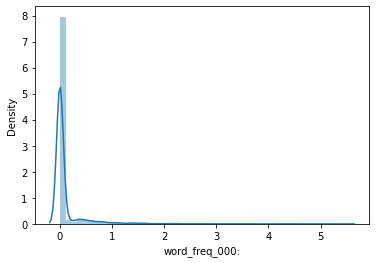

In [18]:
sns.distplot(data['word_freq_000:'],kde=True)

#### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam". 
#### KNN - K nearest neighbor K-NN algorithm  takes data which are the same or nearly the same and groups them into similar categories .As data comes in and it has a certain reltionship with a certain group of data it is grouped together in a category.
#### SVMs are a commonly used supervised learning model for classification and regression. This method is successful with small data sets and works well with high-dimensional spaces.The system can quickly categorize fresh observations after being trained on a data set. It accomplishes this by using one or more hyperplanes to divide the data set into two categoriesNaïve Bayes is a method that  allows classifiers to be constructed very easily , it also works very well with small datasets.
####  Penalized logistic regression- The logistic model is penalized for having too many variables in penalized logistic regression. The coefficients of the less important variables are reduced to zero as a result of this. Regularization is another term for it.
#### Logistic regression -Logistic regression is a process by which the discrete outcome of a certain input is modelled with a known input variable.Most popular logistic models are binary in  nature that means the take two values such as yes/ no.It is mainly used in classification problems.


### Question 5. Describe the importance of training and test data. Why do we separate data into these subsets? 
Training data is used by algorithms to learn by means of observations , They are important as they have labels in which are put in a computer readable form for them to understand.The observations have one or more input variables and one output variable.
Test data helps to measure the how accurate or efficient the algorithm used train the machine was.It also  ensures there is no overfitting or overtraining of the data. 



### Question 6. What is k-fold cross validation and what do we use it for? 
Cross-validation  resamples models of learning on a data sample that is limited
That k-fold cross validation is a method that helps helps to estimate how the  model is performing on new data
In the procedure we take one parameter K that describes the group numbering in which the sample of data is split into hence its name K fold cross validation. It helps to disclose data that was unseen .It is a simple method and easy to learn.K is chosen  i.e 10 and it hence becomes k =10 fold cross validation


## Question 7. How is k-fold cross validation different from stratified k-fold cross validation?

### Stratified k-fold cross-validation is  similar to k-fold cross-validation only that isntead of random sampling it uses stratas.
### KFold divides a dataset into K folds , the data is stratified to make sure that all folds contained in the dataset has the same mix of observations with a certain label.Therefore  strtified K-fold is a better version of KFold as it deals with imbalanced distributions. 




### Question 8. Choose one model from question four. Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam".

#### Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: 

#### Answer 
#### In the logistic regression model, Parameters used are  C,  Inverse of regularization strength; must be a positive float. C: float, default=1.0 Smaller values indicate better regularization, such like in support vector machines.
 #### Also in logistic regression if you make C really high the model effectively becomes a logistic regression model...
#### Without looking at the data, it's impossible to say which k value is ideal. If training samples of related classes form clusters, a k value of 1 to 10 will give decent results. When data is randomly distributed, it's impossible to predict which k value will produce the greatest results. In such circumstances, you must conduct an empirical analysis to discover it.
   #### Rather than focusing on finding an appropriate k value, modify the data using techniques like SVD and PCA. Then KNN or SVM can categorize data extremely effectively..


## a) Logistic regression

In [20]:
#Set up training and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

#Note: random_state ensures same data will be generated for example each time

#Note: logistic regression in sklearn is preset to be a regularization model with C=100).
#If you make C really high the model effectively becomes a logistic regression model...
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_train, y_train,)

predict = logreg.predict(X_test)
predict
train_acc = logreg.score(X_train,y_train)
test_acc = logreg.score(X_test,y_test)
print("training accuracy :", train_acc)

print("testing accuracy :", test_acc)

confusion_matrix(predict,y_test)

report = classification_report( y_test,predict)
report

training accuracy : 0.8118012422360248
testing accuracy : 0.8196958725561188


'              precision    recall  f1-score   support\n\n           0       0.80      0.94      0.87       852\n           1       0.87      0.62      0.73       529\n\n    accuracy                           0.82      1381\n   macro avg       0.83      0.78      0.80      1381\nweighted avg       0.83      0.82      0.81      1381\n'

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=5,)
scores.mean()

0.8122178161733465

In [24]:
from sklearn.model_selection import KFold 
k = 5
kf = KFold(n_splits=k,shuffle=True, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8139486852664873


In [25]:
from sklearn.model_selection import KFold 
k = 5
kf = KFold(n_splits=k,shuffle=True, random_state=1)
model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.811991455412359


### Question 9. Choose a second model from question four. Using the same three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Did this model predict test data better than your previous model? 

### Yes the model support Vector machine performed better than logistic regression



# Support Vector Machine 

In [51]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = svclassifier.predict(X_test)
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print(f'The auc score is: {roc_auc_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score is: 0.8436482084690554
The auc score is: 0.8259266988265213
[[501  37]
 [107 276]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       538
           1       0.88      0.72      0.79       383

    accuracy                           0.84       921
   macro avg       0.85      0.83      0.83       921
weighted avg       0.85      0.84      0.84       921



### Question 10. Choose a third model from question four. Using the same three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Did this model predict test data better than your previous models?
 ### The model performed better than Support vector machine and Logistic regression

 # K-Nearest Neighbors 

In [36]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

classifier.fit(X_train, y_train)

knn_predict = classifier.predict(X_test)
knn_predict
train_acc = classifier.score(X_train,y_train)
test_acc = classifier.score(X_test,y_test)
print("training accuracy :", train_acc)

print("testing accuracy :", test_acc)

confusion_matrix(knn_predict,y_test)

training accuracy : 0.8565217391304348
testing accuracy : 0.8034744842562432


array([[483, 126],
       [ 55, 257]], dtype=int64)

In [37]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(classifier, X, y, cv=5)
scores.mean()

0.8159094556956049

## using k fold the model definitely produced better results 0.81162 compared to 0.81590 

In [38]:
k = 5
kf = KFold(n_splits=k, shuffle=True,random_state=1)
model = KNeighborsClassifier()
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8161216541566351


### Question 11. Choose a fourth model from question four. Using the same three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Did this model predict test data better than your previous models? 
                   ## NAIVE BAYES did not perform better than previous models.

In [42]:
# Training the Model
# We will start by splitting our data into training and test sets
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(f'The accuracy score is: {accuracy_score(y_test, predicted)}')
print(f'The auc score is: {roc_auc_score(y_test, predicted)}')
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))


The accuracy score is: 0.7242128121606949
The auc score is: 0.6710401156978267
[[531   7]
 [247 136]]
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       538
           1       0.95      0.36      0.52       383

    accuracy                           0.72       921
   macro avg       0.82      0.67      0.66       921
weighted avg       0.79      0.72      0.69       921



## Question 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy. Did this model predict test data better than your previous models? 

## The model had better predictions than the previous models

In [45]:
data_final2 =data[['word_freq_remove:', 'word_freq_your:', 'word_freq_000:','spam','word_freq_business:','word_freq_free:','char_freq_$:' ]]


In [48]:
#update data to set up for train test split
X = data_final2.loc[:, data_final2.columns != 'spam']
y = data_final2['spam']

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

classifier.fit(X_train, y_train)

knn_predict = classifier.predict(X_test)
knn_predict
train_acc = classifier.score(X_train,y_train)
test_acc = classifier.score(X_test,y_test)
print("training accuracy :", train_acc)

print("testing accuracy :", test_acc)

confusion_matrix(knn_predict,y_test)

training accuracy : 0.8565217391304348
testing accuracy : 0.8034744842562432


array([[483, 126],
       [ 55, 257]], dtype=int64)

In [50]:
k = 5
kf = KFold(n_splits=k, shuffle=True,random_state= None)
model = KNeighborsClassifier()
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8761145730066563


## Question 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model. Why did you select this model among all of the models that you ran?

## The best model in all the models is KNN which hs the highest accuracy score of 0.8626

In [53]:
data_final2 =data[['word_freq_remove:', 'word_freq_your:', 'word_freq_000:','spam','word_freq_business:','word_freq_free:','char_freq_$:' ]]


In [54]:
#update data to set up for train test split
X = data_final2.loc[:, data_final2.columns != 'spam']
y = data_final2['spam']

## Logistic regression 

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

#Note: random_state ensures same data will be generated for example each time

#Note: logistic regression in sklearn is preset to be a regularization model with C=100).
#If you make C really high the model effectively becomes a logistic regression model...
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_train, y_train,)

predict = logreg.predict(X_test)
predict
train_acc = logreg.score(X_train,y_train)
test_acc = logreg.score(X_test,y_test)
print("training accuracy :", train_acc)

print("testing accuracy :", test_acc)

confusion_matrix(predict,y_test)

report = classification_report( y_test,predict)
report

training accuracy : 0.8573369565217391
testing accuracy : 0.8436482084690554


'              precision    recall  f1-score   support\n\n           0       0.82      0.94      0.88       538\n           1       0.89      0.71      0.79       383\n\n    accuracy                           0.84       921\n   macro avg       0.86      0.82      0.83       921\nweighted avg       0.85      0.84      0.84       921\n'

## B (using the second model svm with three additional variables)

In [56]:
data_final2 =data[['word_freq_remove:', 'word_freq_your:', 'word_freq_000:','spam','word_freq_business:','word_freq_free:','char_freq_$:' ]]


In [57]:
#update data to set up for train test split
X = data_final2.loc[:, data_final2.columns != 'spam']
y = data_final2['spam']

In [58]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = svclassifier.predict(X_test)
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print(f'The auc score is: {roc_auc_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score is: 0.8436482084690554
The auc score is: 0.8259266988265213
[[501  37]
 [107 276]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       538
           1       0.88      0.72      0.79       383

    accuracy                           0.84       921
   macro avg       0.85      0.83      0.83       921
weighted avg       0.85      0.84      0.84       921



# c using KNN 

In [59]:
data_final2 =data[['word_freq_remove:', 'word_freq_your:', 'word_freq_000:','spam','word_freq_business:','word_freq_free:','char_freq_$:' ]]


In [60]:
#update data to set up for train test split
X = data_final2.loc[:, data_final2.columns != 'spam']
y = data_final2['spam']

In [61]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

classifier.fit(X_train, y_train)

knn_predict = classifier.predict(X_test)
knn_predict
train_acc = classifier.score(X_train,y_train)
test_acc = classifier.score(X_test,y_test)
print("training accuracy :", train_acc)

print("testing accuracy :", test_acc)

confusion_matrix(knn_predict,y_test)

training accuracy : 0.9010869565217391
testing accuracy : 0.8773072747014115


array([[501,  76],
       [ 37, 307]], dtype=int64)

In [62]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(classifier, X, y, cv=5)
scores.mean()

0.8626382004437521

## Question 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power? For this answer try to speculate about a variable outside the variables available in the data that would improve you model. 
	word_freq_free:-This is because most spam mail are usually trying to give incentives and gifts 


   ## Question 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam. List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.

# Support vector Machines
# Logistic regression 
# Linear regression
# Ridge regression
# Decision trees
